In [2]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [7]:
years_Cluster_not_indexs={
    0:[1918, 1966, 1974, 1987, 2002],
    1:[1901, 1907, 1928, 1932, 1941, 1951, 1965, 1972, 1979, 1992, 2004, 2009],
    2:[1904, 1905, 1911, 1913, 1920, 1929, 1939, 1952, 1968, 1982, 1985, 1986, 1999],
    3:[1902, 1971, 1984, 1989, 1991, 1993, 1995, 1997, 1998],
    4:[1909, 1919, 1921, 1922, 1925, 1930, 1934, 1936, 1937, 1943, 1948, 1953, 1955, 1960, 1969, 1980, 2001, 2003, 2008],
    5:[1908, 1926, 1927, 1944, 1945, 1950, 1954, 1970, 1973, 1976, 1977, 1990, 2010],
    6:[1903, 1906, 1912, 1915, 1935, 1940, 1957, 1962, 1963, 1967, 1996, 2000],
    7:[1914, 1923, 1931, 1933, 1946, 1958, 1959, 1961, 1994, 2005, 2006],
    8:[1910, 1916, 1917, 1924, 1938, 1942, 1947, 1949, 1956, 1964, 1975, 1978, 1981, 1983, 1988, 1994]
}

years_Cluster = {}

for key, values in years_Cluster_not_indexs.items():
    years_Cluster[key] = [year - 1901 for year in values]
    
years_Cluster

{0: [17, 65, 73, 86, 101],
 1: [0, 6, 27, 31, 40, 50, 64, 71, 78, 91, 103, 108],
 2: [3, 4, 10, 12, 19, 28, 38, 51, 67, 81, 84, 85, 98],
 3: [1, 70, 83, 88, 90, 92, 94, 96, 97],
 4: [8,
  18,
  20,
  21,
  24,
  29,
  33,
  35,
  36,
  42,
  47,
  52,
  54,
  59,
  68,
  79,
  100,
  102,
  107],
 5: [7, 25, 26, 43, 44, 49, 53, 69, 72, 75, 76, 89, 109],
 6: [2, 5, 11, 14, 34, 39, 56, 61, 62, 66, 95, 99],
 7: [13, 22, 30, 32, 45, 57, 58, 60, 93, 104, 105],
 8: [9, 15, 16, 23, 37, 41, 46, 48, 55, 63, 74, 77, 80, 82, 87, 93]}

In [21]:
cluster_numbers=[]
for year in range(0, 110):  # Assuming you want to cover years from 1901 to 2010
    for key, values in years_Cluster.items():
        if year in values:
            cluster_numbers.append(key)

print(cluster_numbers)

[1, 3, 6, 2, 2, 6, 1, 5, 4, 8, 2, 6, 2, 7, 6, 8, 8, 0, 4, 2, 4, 4, 7, 8, 4, 5, 5, 1, 2, 4, 7, 1, 7, 4, 6, 4, 4, 8, 2, 6, 1, 8, 4, 5, 5, 7, 8, 4, 8, 5, 1, 2, 4, 5, 4, 8, 6, 7, 7, 4, 7, 6, 6, 8, 1, 0, 6, 2, 4, 5, 3, 1, 5, 0, 8, 5, 5, 8, 1, 4, 8, 2, 8, 3, 2, 2, 0, 8, 3, 5, 3, 1, 3, 7, 8, 3, 6, 3, 3, 2, 6, 4, 0, 4, 1, 7, 7, 4, 1, 5]


In [24]:
# df = pd.DataFrame(cluster_numbers, columns=(['Cluster Number']))
# df.to_csv('Rishi 1901-2010.csv')

In [9]:
def PlotMap(data,cluster=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])
    

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Cluster {cluster}')
    
    plt.savefig(f'Cluster {cluster}.png', dpi=100, bbox_inches='tight')


In [10]:
#Accessing the zone files
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]

#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1.append(xarray.open_dataset(path1[i]))
    zone2.append(xarray.open_dataset(path2[i]))
    zone3.append(xarray.open_dataset(path3[i]))
    zone4.append(xarray.open_dataset(path4[i]))
    zone5.append(xarray.open_dataset(path5[i]))
    zone6.append(xarray.open_dataset(path6[i]))

In [11]:
def getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster1_years):
    cluster_zone1=[]
    cluster_zone2=[]
    cluster_zone3=[]
    cluster_zone4=[]
    cluster_zone5=[]
    cluster_zone6=[]

    for i in cluster1_years:
        cluster_zone1.append(zone1[i])
        cluster_zone2.append(zone2[i])
        cluster_zone3.append(zone3[i])
        cluster_zone4.append(zone4[i])
        cluster_zone5.append(zone5[i])
        cluster_zone6.append(zone6[i])

    cluster_zone1_combined=xarray.concat(cluster_zone1,dim='years')
    cluster_zone2_combined=xarray.concat(cluster_zone2,dim='years')
    cluster_zone3_combined=xarray.concat(cluster_zone3,dim='years')
    cluster_zone4_combined=xarray.concat(cluster_zone4,dim='years')
    cluster_zone5_combined=xarray.concat(cluster_zone5,dim='years')
    cluster_zone6_combined=xarray.concat(cluster_zone6,dim='years')


    cluster_zone1_mean=cluster_zone1_combined['rain'].mean(dim='years')
    cluster_zone2_mean=cluster_zone2_combined['rain'].mean(dim='years')
    cluster_zone3_mean=cluster_zone3_combined['rain'].mean(dim='years')
    cluster_zone4_mean=cluster_zone4_combined['rain'].mean(dim='years')
    cluster_zone5_mean=cluster_zone5_combined['rain'].mean(dim='years')
    cluster_zone6_mean=cluster_zone6_combined['rain'].mean(dim='years')


    cluster_fullMap=cluster_zone1_mean.combine_first(cluster_zone2_mean.combine_first(cluster_zone3_mean.combine_first(cluster_zone4_mean.combine_first(cluster_zone5_mean.combine_first(cluster_zone6_mean)))))
    
    return cluster_fullMap

In [12]:
#Getting the cluster zonal data and meaning them
cluster1_years=years_Cluster[0]
cluster2_years=years_Cluster[1]
cluster3_years=years_Cluster[2]
cluster4_years=years_Cluster[3]
cluster5_years=years_Cluster[4]
cluster6_years=years_Cluster[5]
cluster7_years=years_Cluster[6]
cluster8_years=years_Cluster[7]
cluster9_years=years_Cluster[8]

cluster1_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster1_years)
cluster2_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster2_years)
cluster3_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster3_years)
cluster4_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster4_years)
cluster5_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster5_years)
cluster6_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster6_years)
cluster7_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster7_years)
cluster8_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster8_years)
cluster9_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster9_years)


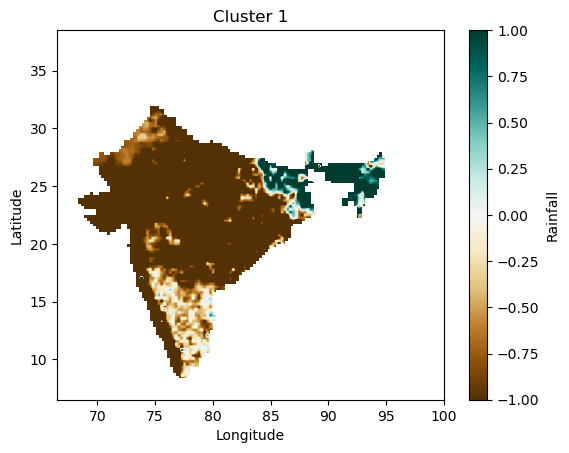

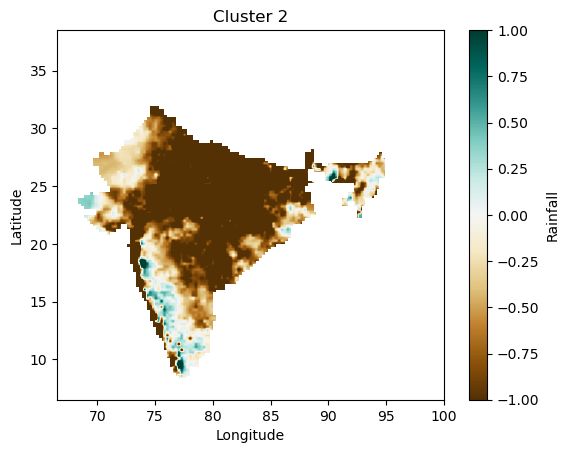

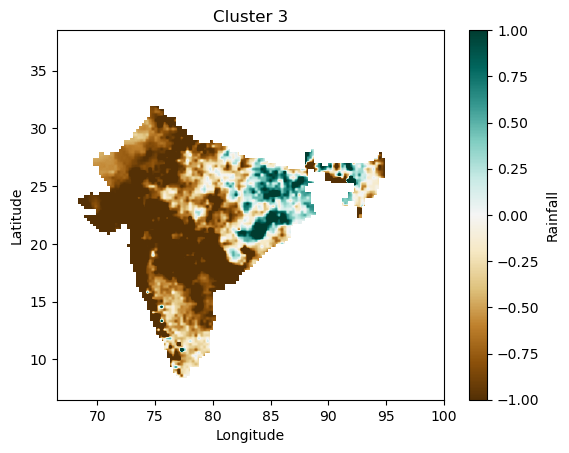

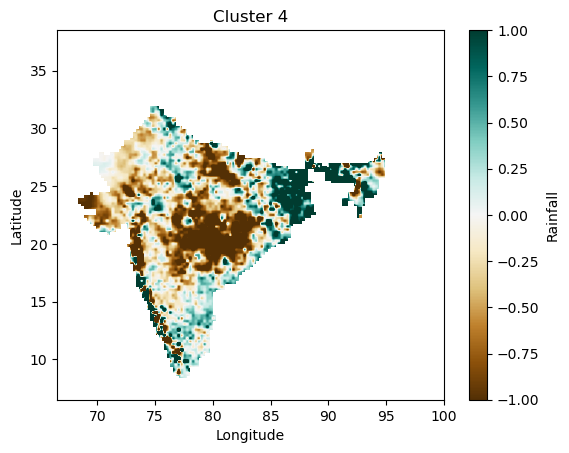

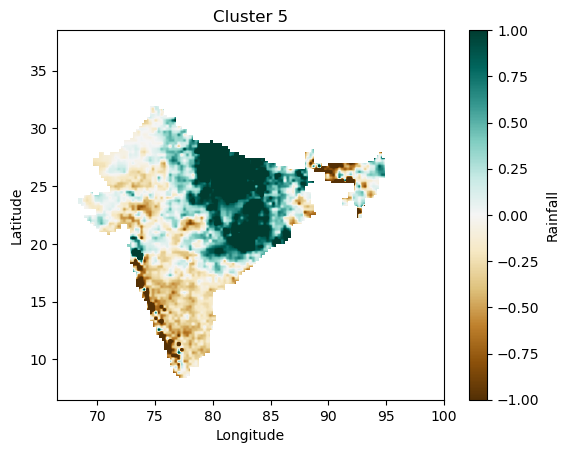

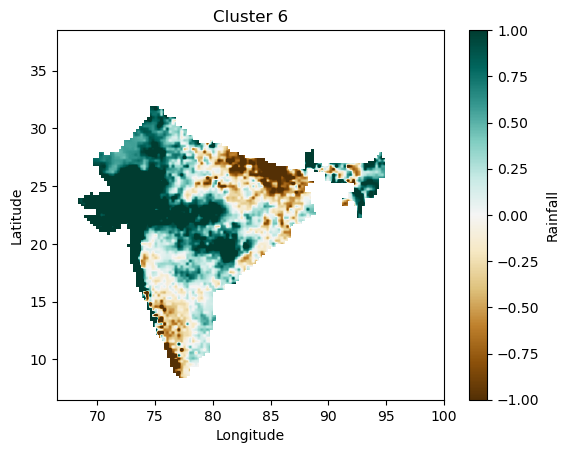

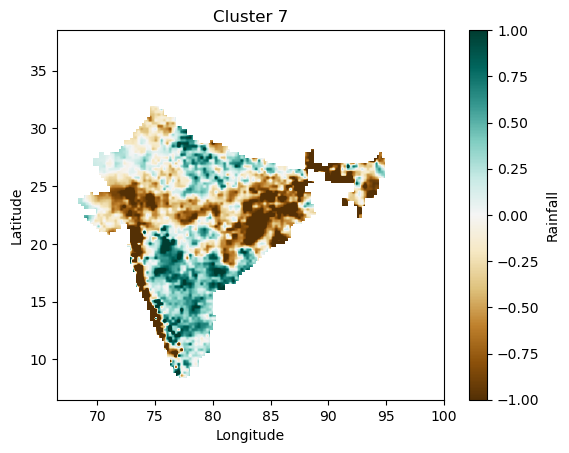

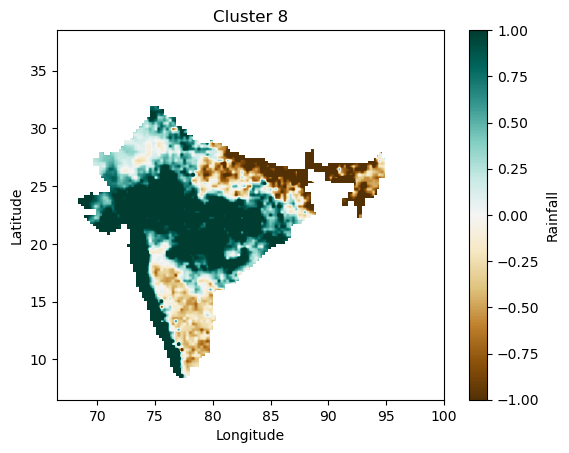

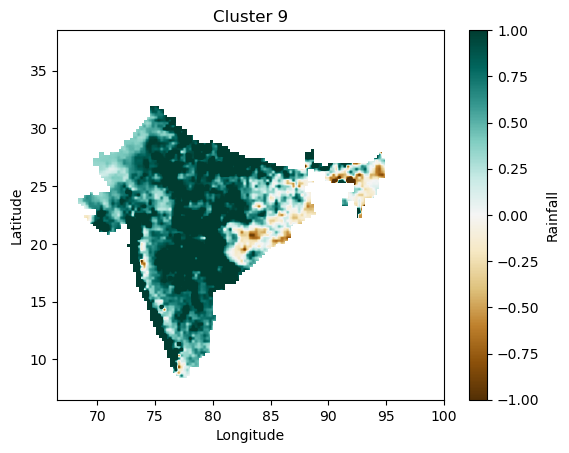

In [13]:
PlotMap(cluster1_fullMap,cluster=1)
PlotMap(cluster2_fullMap,cluster=2)
PlotMap(cluster3_fullMap,cluster=3)
PlotMap(cluster4_fullMap,cluster=4)
PlotMap(cluster5_fullMap,cluster=5)
PlotMap(cluster6_fullMap,cluster=6)
PlotMap(cluster7_fullMap,cluster=7)
PlotMap(cluster8_fullMap,cluster=8)
PlotMap(cluster9_fullMap,cluster=9)



In [25]:
#Accessing the zone files
zone1_predict=[]
zone2_predict=[]
zone3_predict=[]
zone4_predict=[]
zone5_predict=[]
zone6_predict=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]

#Storing the paths in a array
for i in range(2011,2023):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1_predict.append(xarray.open_dataset(path1[i]))
    zone2_predict.append(xarray.open_dataset(path2[i]))
    zone3_predict.append(xarray.open_dataset(path3[i]))
    zone4_predict.append(xarray.open_dataset(path4[i]))
    zone5_predict.append(xarray.open_dataset(path5[i]))
    zone6_predict.append(xarray.open_dataset(path6[i]))

In [26]:
predict_category=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rain Category 2011-2022.csv",index_col=0)
predict_category

,zone1,zone2,zone3,zone4,zone5,zone6
0,6,4,5,3,4,5
1,4,4,5,3,4,4
2,5,4,4,4,5,5
3,4,3,4,4,3,4
4,4,3,4,4,3,2
5,4,4,4,4,4,4
6,4,3,4,5,3,4
7,4,4,4,4,4,4
8,5,4,5,4,5,6
9,5,4,6,5,4,5


In [27]:
predicted=km.predict(predict_category)

In [28]:
predicted

array([0, 4, 0, 6, 1, 3, 6, 3, 0, 4, 3, 8])

In [29]:
maps_of_predicts=[]
for i in range(len(zone1_predict)):
    maps_of_predicts.append(xarray.merge([zone1_predict[i], zone2_predict[i], zone3_predict[i], zone4_predict[i], zone5_predict[i], zone6_predict[i]]))
    

In [30]:
len(maps_of_predicts)

12

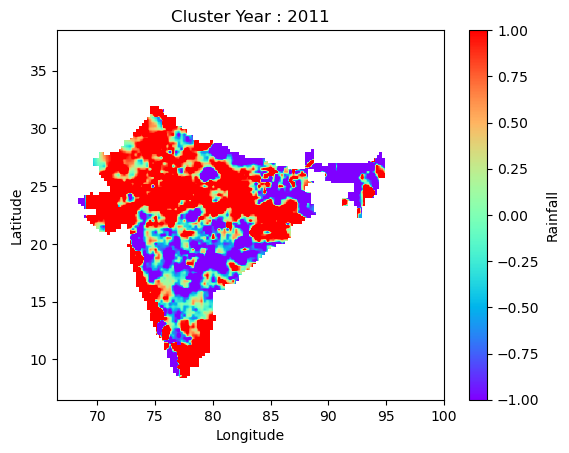

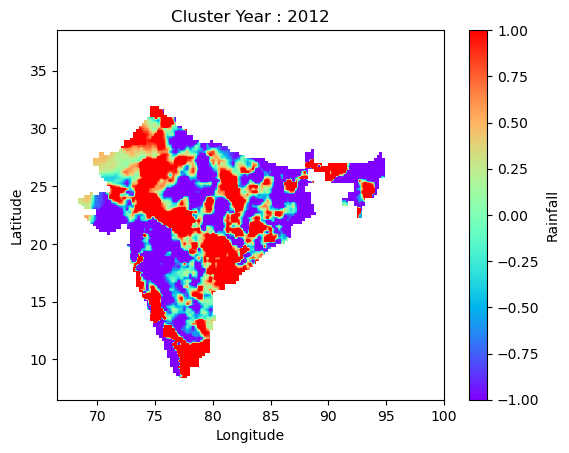

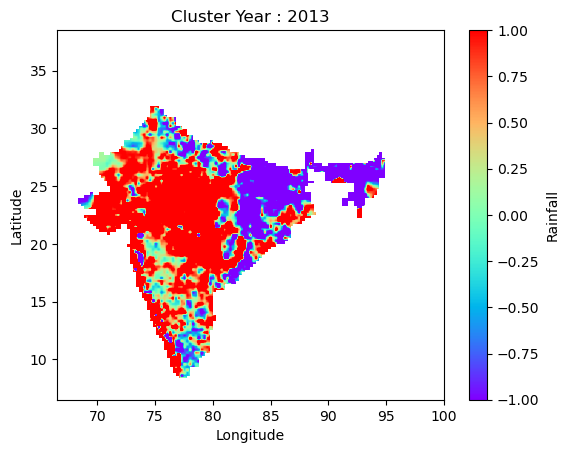

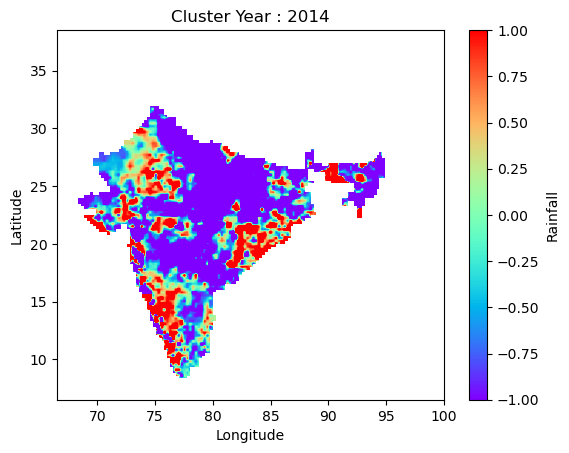

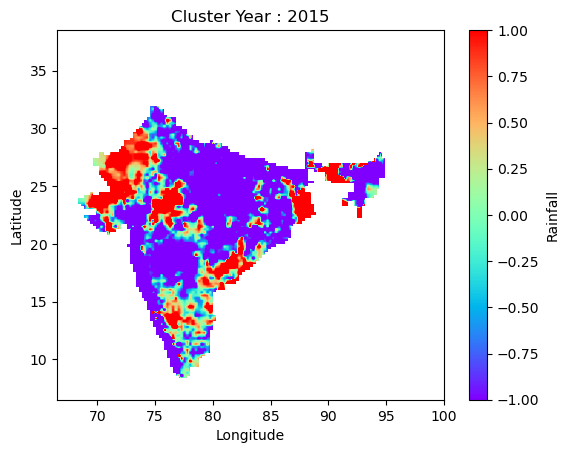

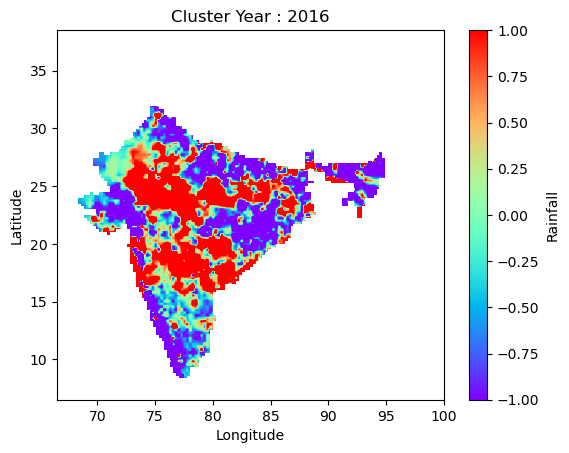

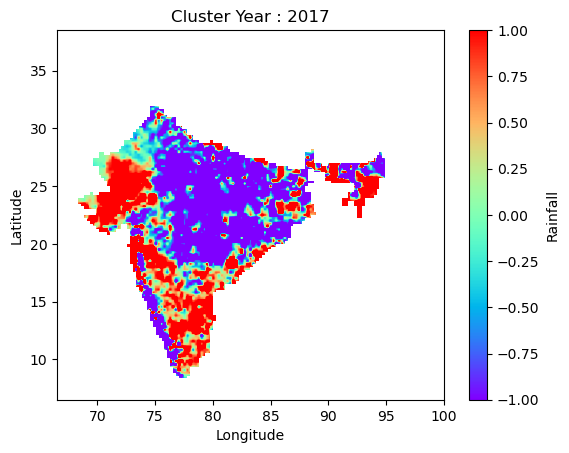

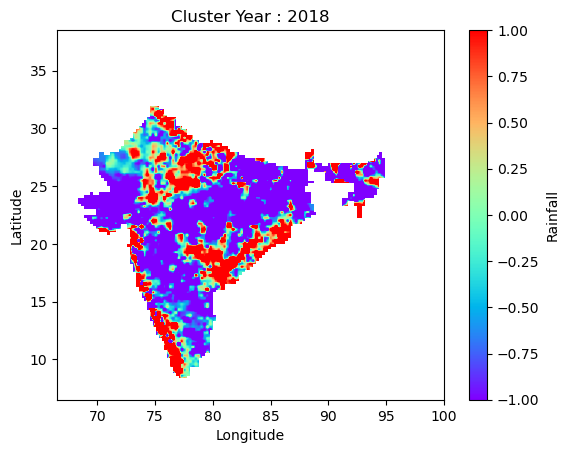

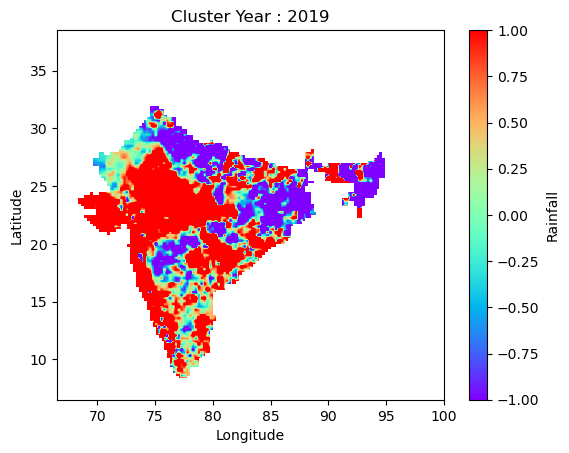

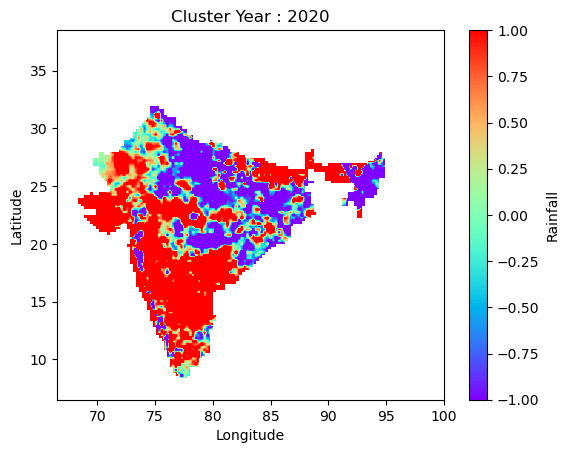

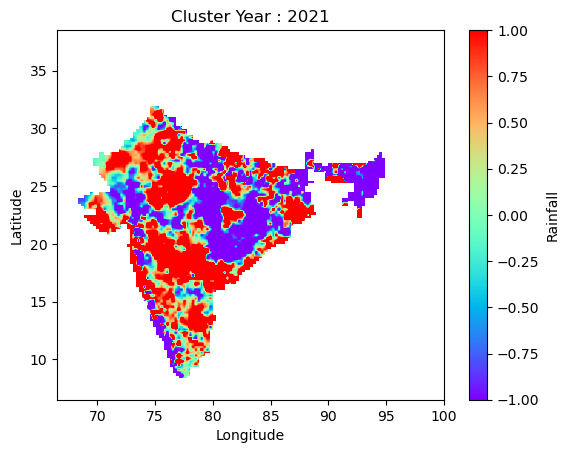

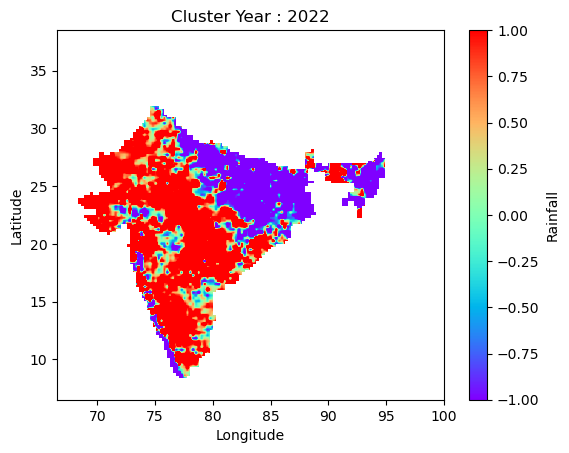

In [22]:
year=2011
for i in maps_of_predicts:
    PlotMap(i.to_array()[0],f"Year : {year}")
    year+=1

In [32]:
# df = pd.DataFrame(predicted, columns=(['Cluster Number']))
# df.to_csv('Cluster Number 2011-2022.csv')
# df

,Cluster Number
0,0
1,4
2,0
3,6
4,1
5,3
6,6
7,3
8,0
9,4
